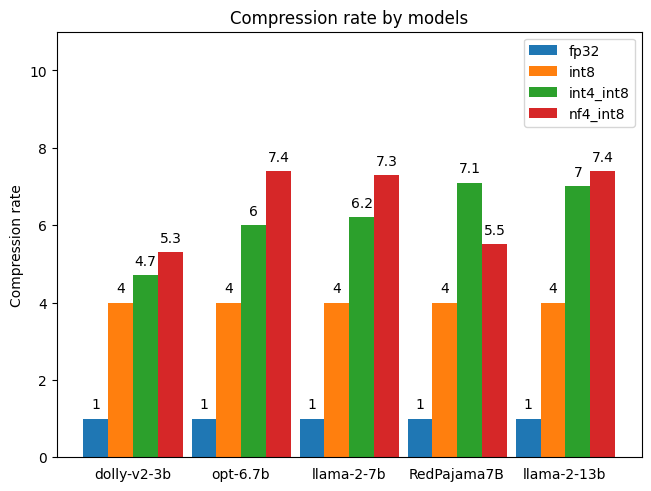

In [20]:
import matplotlib.pyplot as plt
import numpy as np

columns = ("dolly-v2-3b", "opt-6.7b", "llama-2-7b", "RedPajama7B", "llama-2-13b")
model_sizes = {
    'fp32': (1,1,1,1,1),
    'int8': (4,4,4,4,4),
    'int4_int8': (4.7, 6.0, 6.2, 7.1, 7.0),
    'nf4_int8': (5.3, 7.4, 7.3, 5.5, 7.4),
}

x = np.arange(len(columns))  # the label locations
width = 0.23  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

color = plt.get_cmap('winter')
from matplotlib import cm
# color = cm.inferno_r(np.linspace(.4, .8, 16))

from colour import Color

red = Color("red")
colors = list(red.range_to(Color("green"),10))
colors = [color.rgb for color in colors]


for mode, sizes in model_sizes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, sizes, width, label=mode)
    ax.bar_label(rects, padding=5)
    multiplier += 1


rows = ['Accuracy diff', 'Perplexity diff']
cell_text = [
    [1,1,1,1,1],
    [1,1,1,1,1]
]

# ax.scatter(df['Val2'].tolist(), [0,1,2], color=[1,0.8,0], zorder=2)

# the_table = plt.table(cellText=cell_text,
#                       rowLabels=rows,
#                     #   rowColours=colors,
#                       colLabels=columns,
#                       cellLoc='center',
#                       loc='bottom',
#                       edges='horizontal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Compression rate')
ax.set_title('Compression rate by models')
ax.set_xticks(x + 0.34, columns)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 11)

plt.show()

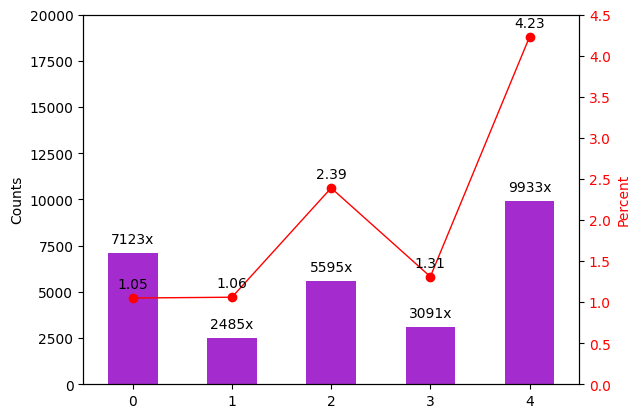

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({
    'Country':['India','America', 'Canada', 'Australia', 'Japan'],
    'Count': [7123,2485, 5595, 3091, 9933],
    'percent':[1.05,1.06, 2.39, 1.31, 4.23]
 })

#AX: bar chart

ax=df["Count"].plot(kind="bar", color="#A42CCE")
ax.set_ylabel("Counts")
ax.set_xlabel("")
ax.set_ylim(0,20000)
for tick in ax.get_xticklabels():
  tick.set_rotation(0)

#AX2: Create secondary y-axis with same x-axis as above for plotting percent values
ax2=ax.twinx()
ax2.plot(ax.get_xticks(),df["percent"], color="red", linewidth=1, marker = "o")
ax2.grid(False)
ax2.set_ylabel("Percent", color = "red")
ax2.set_ylim(0,4.5)

# function to add details for bars and lines
def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}x".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space),
                    textcoords="offset points", ha='center', va=va)
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space),
                textcoords="offset points", ha='center', va=va)

add_value_labels(ax, typ='bar')
add_value_labels(ax2, typ='line')
ax2.tick_params(labelcolor="red", axis='y')


# function to add details for bars and lines

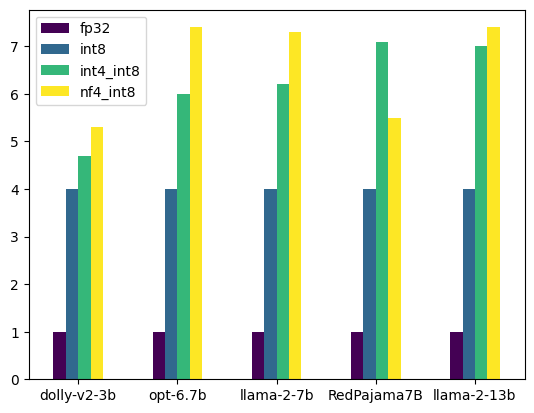

In [29]:
import matplotlib.pyplot as plt
import numpy as np

index = ("dolly-v2-3b", "opt-6.7b", "llama-2-7b", "RedPajama7B", "llama-2-13b")
model_sizes = {
    'fp32': (1,1,1,1,1),
    'int8': (4,4,4,4,4),
    'int4_int8': (4.7, 6.0, 6.2, 7.1, 7.0),
    'nf4_int8': (5.3, 7.4, 7.3, 5.5, 7.4),
}

import matplotlib as mpl
cmap=mpl.colormaps['viridis']
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame(model_sizes, index=index)
ax = df.plot.bar(rot=0, cmap=cmap)#color=['green','yellow', 'blue', 'red'])